# Constitutive modeling of the gastrointestinal tissues:  where are we? 

## Bhavesh Patel

This notebook is a complement to our review paper. It enables an interactive visualization of the results from our review as well as provides a base for viewers to generate additional plots and make further findings/observations. 

# 1. Import required modules  

In [2]:
import os
import pandas as pd
import plotly
import plotly.graph_objects as go
import ipywidgets as ipw
import plotly.express as px
import numpy as np
from ipywidgets import widgets

organ_list = ["Esophagus", "Stomach", "Small intestine", "Large intestine", "Rectum"]

#color for plots
plot_background_color = 'rgba(242, 241, 239, 0.8)'

color_6 = '#fb5607'
color_5 = '#ef476f'
color_2 = '#ffd166'
color_3 = '#06d6a0'
color_4 = '#118ab2'
color_1 = '#073b4c'
color_palette = [color_1, color_2, color_3, color_4, color_5, color_6]

# 2. Import data  

Review results have been stored in an excel spreadsheet stored under docs\review-results.xlsx. There is one sheet for each organ plus a summary sheet with an overview of our research strategy and one sheet with a definition of the term used. Data from this spreadsheet is imported first in the notebook for subsequent analysis. 

In [3]:
# import data
current_folder = os.getcwd() # folder where this notebook is stored (code folder)
main_folder = os.path.dirname(current_folder) # one folder up
data_folder = "docs" # folder where data file "review-results.xlsx" is stored
data_file = "review-results.xlsx" # data file name
data_path = os.path.join(main_folder, data_folder, data_file) # full path of the data file
xl_data = pd.ExcelFile(data_path) # import data from the spreadsheet

# extract each sheet as a panda dataframe and store them in a Python dictionary for subsequent use
data_dict = {} 
print('START')
all_sheets = xl_data.sheet_names
desired_sheets = organ_list
for sheet in all_sheets: 
    if sheet in desired_sheets:
        df = pd.read_excel(xl_data, sheet_name = sheet)
        df["Organ"] = sheet
        data_dict[sheet] = df
        print('Imported sheet:', sheet)
print('COMPLETED: Data has been imported')

START
Imported sheet: Esophagus
Imported sheet: Stomach
Imported sheet: Small intestine
Imported sheet: Large intestine
Imported sheet: Rectum
COMPLETED: Data has been imported


In [4]:
# Combine data from all organs into a single data frame
df_all_data = pd.concat(data_dict, ignore_index=True)
df_all_data.sort_values("Year")

C:\Users\Calmi2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,#,Active model category,Active model type,Age,Author,Comments,DOI,Diseased subjects,Hyperelastic model category,Hyperelastic model type,...,Species category,Species mentioned,Test condition,Test protocol,Title,Unnamed: 25,Viscoelasticity ref,Viscous model type,Year,Zero stress state
37,1,NaN,NaN,NaN,Miftakhov & al.,Modeled passive tissue behavior using a Fung t...,https://doi.org/10.1016/1350-4533(90)90007-U,NaN,Phenomenological,Fung,...,NaN,NaN,NaN,NaN,Biomechanics of small bowel motility,NaN,Not mentioned,NaN,1994,No
0,1,NaN,NaN,NP,Liao & al.,Intact tissue and individual layers (mucosa-su...,https://doi.org/10.1016/S1350-4533(03)00122-X,No,Phenomenological,Fung,...,Rodent,Rat,Ex vivo,Tubular inflation,Stress distribution in the layered wall of the...,NaN,NaN,NaN,2003,Yes
38,2,NaN,NaN,NP,Dou & al.,"duodenum, jejunum, and ileum studied individually",https://doi.org/10.1115/1.1560140,No,Phenomenological,Fung,...,Rodent,Rat,Ex vivo,Tubular inflation,Morphology and stress-strain properties along ...,NaN,Not mentioned,NaN,2003,Yes
39,3,NaN,NaN,2-3 months,Zhao & al.,"duodenum, jejunum, and ileum studied individua...",https://doi.org/10.1007/s00125-003-1233-2,Yes,Phenomenological,Fung,...,Rodent,Rat,Ex vivo,Tubular inflation,Biomechanical and morphometric intestinal remo...,NaN,Not mentioned,NaN,2003,Yes
1,2,NaN,NaN,NP,Zeng & al.,"8 normal, 27 diseased (diabetic) with differen...",https://doi.org/10.1088/0967-3334/25/5/011,Yes,Phenomenological,Fung,...,Rodent,Rat,Ex vivo,Tubular extension - Tubular inflation - Tubula...,Torque properties of a rat oesophagus for phys...,NaN,NaN,NaN,2004,No
2,3,NaN,NaN,2-3 months,Yang & al.,NaN,https://doi.org/10.1114/B%3AABME.0000039356.24...,No,Phenomenological,Fung,...,Rodent,Rat,Ex vivo,Tubular extension - Tubular inflation - Tubula...,Shear modulus of elasticity of the esophagus,NaN,NaN,NaN,2004,Yes
3,4,NaN,NaN,3-4 months,Yang & al.,Mucosa-submucosa and muscle layers tested indi...,https://doi.org/10.1115/1.2187033,No,Structure-based,Holzapfel - Modified exponential - Bilinear,...,Swine,Porcine/Pig,Ex vivo,Planar uniaxial,"Directional, Regional, and Layer Variations of...",NaN,NaN,NaN,2006,Yes
4,5,NaN,NaN,3-4 months,Yang & al.,Only Muscle and mucosa layers tested individua...,https://doi.org/10.1115/1.2354206,No,Structure-based,Holzapfel - Modified exponential - Bilinear,...,Swine,Porcine/Pig,Ex vivo,Planar uniaxial - Tubular extension - Tubular ...,3D Mechanical Properties of the Layered Esopha...,NaN,NaN,NaN,2006,Yes
16,1,NaN,NaN,Adult,Higa & al.,NaN,https://doi.org/10.1007/978-3-540-36841-0_805,No,NaN,Mooney-Rivlin,...,Goat,Goat,In vivo,Compression,In vivo measurements and constitutive modeling...,NaN,"""In this study, Mooney-Rivlin model incorporat...",Convolution integral,2007,No
5,6,Active stress,Phenomenological,NaN,Yang & al.,FE nice + opening angle + buckling of mucosa +...,https://doi.org/10.1243%2F09544119JEIM47,NaN,Structure-based,Holzapfel - Modified exponential - Bilinear,...,NaN,NaN,Ex vivo,Planar uniaxial - Tubular inflation - Other,Three-dimensional finite element model of the ...,NaN,NaN,NaN,2007,Yes


# 3. Review outcomes

In [5]:
#Number of unique studies
df_unique_studies = df_all_data.drop_duplicates(subset ="DOI")
n_unique_studies = len(df_unique_studies)
print("There are ", str(n_unique_studies), " unique manuscripts included in our review")

# Duplicates
df_duplicate_studies = df_all_data[df_all_data.duplicated(['DOI'], keep="first")]
df_duplicate_studies = df_duplicate_studies.drop_duplicates(subset ="DOI")

n_duplicate_studies = len(df_duplicate_studies)
print("There are ", str(n_duplicate_studies), " manuscripts among them that are studying more than one organ")

df_duplicate_studies_all = df_all_data[df_all_data.duplicated(['DOI'], keep=False)]
n_duplicate_total = len(df_duplicate_studies_all)
display(df_duplicate_studies_all[["Author", "Year", "DOI", "Organ"]].sort_values("DOI"))
print("Three of them are studing the large intestine and rectum")
print("One is studing the small intestine, large intestine, and rectum")

print("We are counting them for each organ seperately for convenience, thus have a total of ", str(len(df_all_data)), " studies in our review")

There are  49  unique manuscripts included in our review
There are  4  manuscripts among them that are studying more than one organ


,Author,Year,DOI,Organ
20,Sokolis & al.,2013,https://doi.org/10.1016/j.jmbbm.2013.02.016,Large intestine
33,Sokolis & al.,2013,https://doi.org/10.1016/j.jmbbm.2013.02.016,Rectum
28,Panda & al.,2019,https://doi.org/10.1016/j.jmbbm.2019.103569,Large intestine
35,Panda & al.,2019,https://doi.org/10.1016/j.jmbbm.2019.103569,Rectum
46,Panda & al.,2019,https://doi.org/10.1016/j.jmbbm.2019.103569,Small intestine
29,Zhao & al.,2020,https://doi.org/10.1016/j.jmbbm.2020.104127,Large intestine
36,Zhao & al.,2020,https://doi.org/10.1016/j.jmbbm.2020.104127,Rectum
18,Sokolis & al.,2011,https://doi.org/10.1088/0967-3334/32/12/007,Large intestine
31,Sokolis & al.,2011,https://doi.org/10.1088/0967-3334/32/12/007,Rectum


Three of them are studing the large intestine and rectum
One is studing the small intestine, large intestine, and rectum
We are counting them for each organ seperately for convenience, thus have a total of  54  studies in our review


In [6]:
# Studies not making incompressible tissue assumption
df_sub = df_all_data[df_all_data["Incompressible"].str.contains("No", na = False)]
df_incompressible = df_sub[["Author", "Year", "Organ", "Incompressible", "Hyperelastic model type", "Viscous model type", "Active model type"]].sort_values(["Year", "Author"])
display(df_incompressible)

,Author,Year,Organ,Incompressible,Hyperelastic model type,Viscous model type,Active model type
6,Natali & al.,2009,Esophagus,No,Natali,NaN,NaN
21,Carniel & al.,2013,Large intestine,No,Natali,NaN,NaN
24,Carniel & al.,2014,Large intestine,No,Natali,NaN,NaN
43,Gizzi & al.,2016,Small intestine,No,Holzapfel,Neo-Hookean,Physiological
53,Klemm & al.,2020,Stomach,No,Holzapfel,NaN,Physiological
29,Zhao & al.,2020,Large intestine,No,Holzapfel,NaN,NaN
36,Zhao & al.,2020,Rectum,No,Holzapfel,NaN,NaN


# 4. Sort different hyperelastic model types

In [7]:
# All hyperelastic only studies (exlude viscousand active part)
df_hyperelastic = df_all_data[df_all_data["Hyperelastic model category"].notna() & df_all_data["Viscous model type"].isnull() & df_all_data["Active model category"].isnull()]
display(df_hyperelastic[["Author", "Year", "Organ", "Test protocol", "Modeled entity", "Hyperelastic model type", "Viscous model type", "Active model category"]].sort_values(["Year", "Author"]))

,Author,Year,Organ,Test protocol,Modeled entity,Hyperelastic model type,Viscous model type,Active model category
37,Miftakhov & al.,1994,Small intestine,NaN,Intact tissue,Fung,NaN,NaN
38,Dou & al.,2003,Small intestine,Tubular inflation,Intact tissue,Fung,NaN,NaN
0,Liao & al.,2003,Esophagus,Tubular inflation,Intact tissue - Individual layer,Fung,NaN,NaN
39,Zhao & al.,2003,Small intestine,Tubular inflation,Intact tissue,Fung,NaN,NaN
2,Yang & al.,2004,Esophagus,Tubular extension - Tubular inflation - Tubula...,Intact tissue,Fung,NaN,NaN
1,Zeng & al.,2004,Esophagus,Tubular extension - Tubular inflation - Tubula...,Intact tissue,Fung,NaN,NaN
3,Yang & al.,2006,Esophagus,Planar uniaxial,Individual layer,Holzapfel - Modified exponential - Bilinear,NaN,NaN
4,Yang & al.,2006,Esophagus,Planar uniaxial - Tubular extension - Tubular ...,Individual layer,Holzapfel - Modified exponential - Bilinear,NaN,NaN
48,Gao & al.,2008,Stomach,Planar uniaxial,Intact tissue,Ogden,NaN,NaN
30,Boubaker & al.,2009,Rectum,Planar uniaxial,Intact tissue,Ogden,NaN,NaN


### 4.1. Fung type

In [8]:
df_sub = df_hyperelastic[df_hyperelastic["Hyperelastic model type"].str.contains("Fung", na = False)]
df_fung = df_sub[["Author", "Year", "Organ", "Test protocol", "Modeled entity", "Hyperelastic model type"]].sort_values(["Year", "Author"])
#df_fung.to_excel("fung.xlsx")
display(df_fung)

,Author,Year,Organ,Test protocol,Modeled entity,Hyperelastic model type
37,Miftakhov & al.,1994,Small intestine,NaN,Intact tissue,Fung
38,Dou & al.,2003,Small intestine,Tubular inflation,Intact tissue,Fung
0,Liao & al.,2003,Esophagus,Tubular inflation,Intact tissue - Individual layer,Fung
39,Zhao & al.,2003,Small intestine,Tubular inflation,Intact tissue,Fung
2,Yang & al.,2004,Esophagus,Tubular extension - Tubular inflation - Tubula...,Intact tissue,Fung
1,Zeng & al.,2004,Esophagus,Tubular extension - Tubular inflation - Tubula...,Intact tissue,Fung
7,Stavropoulou & al.,2009,Esophagus,Tubular extension - Tubular inflation,Individual layer,Fung
41,Liao & al.,2010,Small intestine,Tubular extension - Tubular inflation,Intact tissue,Fung
9,Sokolis & al.,2010,Esophagus,Tubular extension - Tubular inflation,Intact tissue - Individual layer,Fung
42,Bellini & al.,2011,Small intestine,Planar biaxial,Intact tissue,Fung - Neo Hookean - Mooney-Rivlin


### 4.2. Isotropic phenomenological

In [9]:
df_sub = df_hyperelastic[df_hyperelastic["Hyperelastic model category"].str.contains("Phenomenological", na = False)]
df_sub = df_sub[~df_sub["Hyperelastic model type"].str.contains("Fung", na = False)]
df_isotropic = df_sub[["Author", "Year", "Organ", "Test protocol", "Modeled entity", "Hyperelastic model type"]].sort_values(["Year", "Author"])
#df_isotropic.to_excel("isotropic-phenomenological.xlsx")
df_isotropic

,Author,Year,Organ,Test protocol,Modeled entity,Hyperelastic model type
48,Gao & al.,2008,Stomach,Planar uniaxial,Intact tissue,Ogden
30,Boubaker & al.,2009,Rectum,Planar uniaxial,Intact tissue,Ogden
19,Tran & al.,2011,Large intestine,Compression - Planar uniaxial,Intact tissue,Ogden
32,Rubod & al.,2012,Rectum,Planar uniaxial,Intact tissue,Mooney-Rivlin
22,Puértolas & al.,2013,Large intestine,Planar uniaxial,Intact tissue,Mooney-Rivlin
34,Boubaker & al.,2015,Rectum,Planar uniaxial,Intact tissue,Ogden
49,Dargar & al.,2016,Stomach,Compression,Individual layer,2nd order reduced polynomial
26,Zhou & al.,2018,Large intestine,Planar uniaxial,Intact tissue,Mooney-Rivlin extended


### 4.3. Holzapfel type

In [10]:
df_sub = df_hyperelastic[df_hyperelastic["Hyperelastic model type"].str.contains("Holzapfel", na = False)]
df_holzapfel = df_sub[["Author", "Year", "Organ", "Test protocol", "Modeled entity", "Hyperelastic model type"]].sort_values(["Year", "Author"])
#df_holzapfel.to_excel("holzapfel.xlsx")
df_holzapfel

,Author,Year,Organ,Test protocol,Modeled entity,Hyperelastic model type
3,Yang & al.,2006,Esophagus,Planar uniaxial,Individual layer,Holzapfel - Modified exponential - Bilinear
4,Yang & al.,2006,Esophagus,Planar uniaxial - Tubular extension - Tubular ...,Individual layer,Holzapfel - Modified exponential - Bilinear
17,Ciarletta & al.,2009,Large intestine,Planar uniaxial - Planar shear,Intact tissue,Holzapfel
11,Sokolis & al.,2013,Esophagus,Tubular extension - Tubular inflation,Intact tissue - Individual layer,Holzapfel
20,Sokolis & al.,2013,Large intestine,Tubular extension - Tubular inflation,Intact tissue,Holzapfel
33,Sokolis & al.,2013,Rectum,Tubular extension - Tubular inflation,Intact tissue,Holzapfel
12,Sommer & al.,2013,Esophagus,Planar uniaxial - Planar biaxial - Tubular ext...,Individual layer,Holzapfel
25,Patel & al.,2018,Large intestine,Tubular extension - Tubular inflation,Intact tissue,Holzapfel
27,Puertolas & al.,2019,Large intestine,Planar biaxial,Intact tissue,Holzapfel - Microfiber Von Mises - Microfiber ...
29,Zhao & al.,2020,Large intestine,Planar biaxial - Tubular inflation,Individual layer,Holzapfel


### 4.4. Natali type

In [11]:
df_sub = df_hyperelastic[df_all_data["Hyperelastic model category"].str.contains("Structure-based", na = False)]
df_sub = df_sub[~df_sub["Hyperelastic model type"].str.contains("Holzapfel", na = False)]
df_natali = df_sub[["Author", "Year", "Organ", "Test protocol", "Modeled entity", "Hyperelastic model type"]].sort_values(["Year", "Author"])
#df_natali.to_excel("natali.xlsx")
df_natali

C:\Users\Calmi2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Author,Year,Organ,Test protocol,Modeled entity,Hyperelastic model type
6,Natali & al.,2009,Esophagus,Planar uniaxial,Individual layer,Natali
21,Carniel & al.,2013,Large intestine,Planar uniaxial,Intact tissue,Natali
24,Carniel & al.,2014,Large intestine,Planar uniaxial,Intact tissue,Natali
13,Sanchez-Molina & al.,2014,Esophagus,Planar uniaxial,Intact tissue - Individual layer,Microcontinuum Mechanics


### 4.5. Microstructure-based

In [12]:
df_sub = df_hyperelastic[df_hyperelastic["Hyperelastic model category"].str.contains("Microstructure-based", na = False)]
df_micro_structure_based = df_sub[["Author", "Year", "Organ", "Test protocol", "Modeled entity", "Hyperelastic model type"]]
#df_micro_structure_based.to_excel("micro-structure-based.xlsx")
df_micro_structure_based.sort_values(["Year", "Author"])

,Author,Year,Organ,Test protocol,Modeled entity,Hyperelastic model type
27,Puertolas & al.,2019,Large intestine,Planar biaxial,Intact tissue,Holzapfel - Microfiber Von Mises - Microfiber ...


# 5. Viscous models

In [13]:
# All hyperelastic only studies (exlude viscousand active part)
df_viscous = df_all_data[df_all_data["Viscous model type"].notna() & df_all_data["Active model category"].isnull()]
#df_viscous.to_excel("viscous.xlsx")
display(df_viscous[["Author", "Year", "Organ", "Test protocol", "Modeled entity", "Hyperelastic model type", "Viscous model type", "Active model category"]].sort_values(["Year", "Author"]))

,Author,Year,Organ,Test protocol,Modeled entity,Hyperelastic model type,Viscous model type,Active model category
16,Higa & al.,2007,Large intestine,Compression,Intact tissue,Mooney-Rivlin,Convolution integral,NaN
52,Fontanella & al.,2019,Stomach,Tubular inflation,Intact tissue,Natali,Viscous variables,NaN
28,Panda & al.,2019,Large intestine,Tubular inflation,Intact tissue,Fung,Panda-type linear,NaN
35,Panda & al.,2019,Rectum,Tubular inflation,Intact tissue,Neo-Hookean,Panda type linear,NaN
46,Panda & al.,2019,Small intestine,Tubular inflation,Intact tissue,Neo-Hookean,Panda-type linear and nonlinear,NaN


# 6. Active models

In [14]:
df_active = df_all_data[df_all_data["Active model category"].notna()]
df_sub = df_active[["Author", "Year", "Organ", "Test protocol", "Modeled entity", "Hyperelastic model category", "Viscous model type", "Active model category"]].sort_values("Year")
#df_sub.to_excel("active.xlsx")
display(df_sub)

,Author,Year,Organ,Test protocol,Modeled entity,Hyperelastic model category,Viscous model type,Active model category
5,Yang & al.,2007,Esophagus,Planar uniaxial - Tubular inflation - Other,Intact tissue - Individual layer,Structure-based,NaN,Active stress
8,Yassi & al.,2009,Esophagus,NP,Individual layer,Phenomenological,NaN,Active stress
40,Gao & al.,2009,Small intestine,Impedance planimetry,Intact tissue,NaN,NaN,Active stress
23,Altomare & al.,2014,Large intestine,Planar uniaxial - Other,Individual layer,Structure-based,NaN,Active strain
14,Kou & al.,2015,Esophagus,NaN,Intact tissue - Individual layer,NaN,NaN,Active stress
43,Gizzi & al.,2016,Small intestine,Planar biaxial,Intact tissue,Structure-based,Neo-Hookean,Active electromechanics
15,Peirlinck & al.,2018,Esophagus,Planar uniaxial - Planar biaxial - Tubular ext...,Intact tissue - Individual layer,Structure-based,NaN,Active strain
51,Brandstaeter & al.,2018,Stomach,NaN,Intact tissue,Phenomenological,NaN,Active strain
53,Klemm & al.,2020,Stomach,Planar uniaxial,Individual layer,Structure-based,NaN,Active stress


# 7. Overall analysis

In [15]:
#Sort data by increasing year and reinitialize the index for convenience
df_all_data_year = df_all_data.sort_values("Year")
df_all_data_year = df_all_data_year.reset_index(drop=True)

organ_list = ["Esophagus", "Stomach", "Small intestine", "Large intestine", "Rectum"]

## 7.1. Overview of the study distribution by organ and passive/active studies

### 7.1.1. Total number of studies per organ and passive/active behavior

In [16]:
total_all = len(df_all_data)
total_hyperelastic = len(df_hyperelastic)
total_viscohyper = len(df_viscous)
total_active = len(df_active)

ratio_hyperelastic = total_hyperelastic/total_all*100
ratio_viscohyper = total_viscohyper/total_all*100
ratio_active = total_active/total_all*100

print("Total studies: ", str(total_all))
print("Passive proportion: ", str(total_hyperelastic), " i.e. ",  str(round(ratio_hyperelastic)), "%")
print("Viscohyperelastic proportion: ", str(total_viscohyper), " i.e. ", str(round(ratio_viscohyper)), "%")
print("Active proportion: ", str(total_active), " i.e. ", str(round(ratio_active)), "%")

Total studies:  54
Passive proportion:  40  i.e.  74 %
Viscohyperelastic proportion:  5  i.e.  9 %
Active proportion:  9  i.e.  17 %


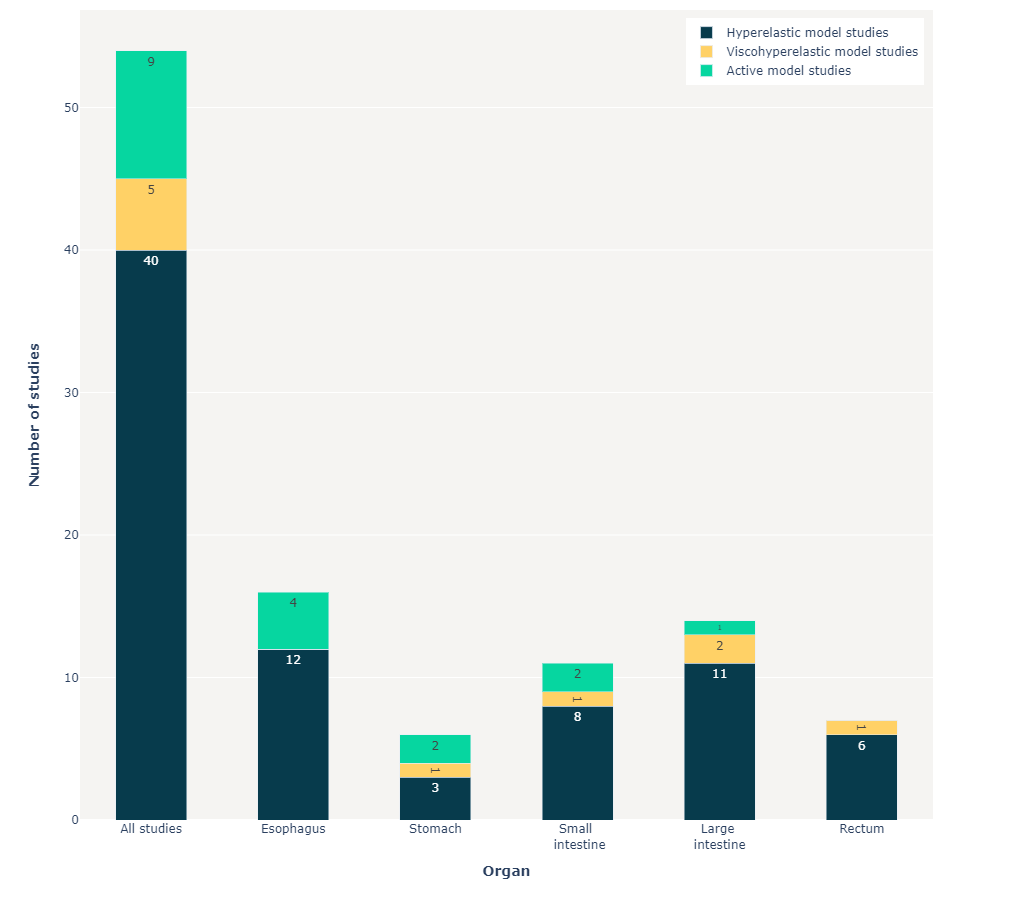

In [35]:
#Study count
hyperelastic_count = []
hyperelastic_count.append(total_hyperelastic)
for organ in organ_list:
    hyperelastic_count.append(len(df_hyperelastic[(df_hyperelastic["Organ"].str.contains(organ, na = False))]))

viscohyper_count = []
viscohyper_count.append(total_viscohyper)
for organ in organ_list:
    viscohyper_count.append(len(df_viscous[(df_viscous["Organ"].str.contains(organ, na = False))]))
    
active_count = []
active_count.append(total_active)
for organ in organ_list:
    active_count.append(len(df_active[(df_active["Organ"].str.contains(organ, na = False))]))

fig12 = go.Figure(data=[go.Bar(name = 'Hyperelastic model studies',
            x=['All studies', 'Esophagus', 'Stomach', 'Small <br> intestine', 'Large <br>intestine', 'Rectum'], y=hyperelastic_count,
            text=hyperelastic_count,
            textposition='auto',
            marker=dict(color=color_palette[0])
            ),
            go.Bar(name = 'Viscohyperelastic model studies',
            x=['All studies', 'Esophagus', 'Stomach', 'Small <br> intestine', 'Large <br>intestine', 'Rectum'], y=viscohyper_count,
            text=viscohyper_count,
            textposition='auto',
            marker=dict(color=color_palette[1])
            ),
            go.Bar(name = 'Active model studies',
            x=['All studies', 'Esophagus', 'Stomach', 'Small <br> intestine', 'Large <br>intestine', 'Rectum'], y=active_count,
            text=active_count,
            textangle = 0,
            textposition='auto',
            marker=dict(color=color_palette[2])
            )
    ])

fig12.update_layout(
    barmode = 'stack',
    bargap = 0.5,
    autosize = False,
    width = 900,
    height = 900,
    xaxis = dict(title="<b> Organ <b>", showgrid = False, dtick = 1),
    yaxis = dict(title="<b> Number of studies <b>"),
    plot_bgcolor = plot_background_color,
    legend = dict(yanchor="top", y=0.99, xanchor="right", x=0.99), 
    legend_traceorder = 'normal',
    margin = go.layout.Margin(
        t = 10, #top margin
    )
)

fig12.show()
fig12.write_image("total-organ-wise.png", engine="kaleido", scale = 1.0)

In [18]:
#Total studies
print("TOTAL")
total = hyperelastic_count[0] + viscohyper_count[0] + active_count[0]
total_esophagus = hyperelastic_count[1] + viscohyper_count[1] + active_count[1]
total_stomach = hyperelastic_count[2] + viscohyper_count[2] + active_count[2]
total_small_intestine = hyperelastic_count[3] + viscohyper_count[3] + active_count[3]
total_large_intestine = hyperelastic_count[4] + viscohyper_count[4] + active_count[4]
total_rectum = hyperelastic_count[5] + viscohyper_count[5] + active_count[5]

proportion_esophagus = round(total_esophagus/total*100, 1)
proportion_stomach = round(total_stomach/total*100, 1)
proportion_small_intestine = round(total_small_intestine/total*100, 1)
proportion_large_intestine = round(total_large_intestine/total*100, 1)
proportion_rectum = round(total_rectum/total*100, 1)

message = "Proportion of total studies: esophagus " + str(proportion_esophagus) \
        + "%, stomach " + str(proportion_stomach) \
        + "%, small intestine " + str(proportion_small_intestine) \
        + "%, large intestine " + str(proportion_large_intestine) \
        + "%, rectum " + str(proportion_rectum) + "%"
print(message)
print("Total esophagus + large intestine: ", str(proportion_esophagus+proportion_large_intestine))

#Active
print("ACTIVE")
message = "Proportion of active studies: esophagus " + str(round(active_count[1]/active_count[0]*100, 1)) \
        + "%, stomach " + str(round(active_count[2]/active_count[0]*100, 1)) \
        + "%, small intestine " + str(round(active_count[3]/active_count[0]*100, 1)) \
        + "%, large intestine " + str(round(active_count[4]/active_count[0]*100, 1)) \
        + "%, rectum " + str(round(active_count[5]/active_count[0]*100, 1)) + "%"
print(message)

TOTAL
Proportion of total studies: esophagus 29.6%, stomach 11.1%, small intestine 20.4%, large intestine 25.9%, rectum 13.0%
Total esophagus + large intestine:  55.5
ACTIVE
Proportion of active studies: esophagus 44.4%, stomach 22.2%, small intestine 22.2%, large intestine 11.1%, rectum 0.0%


### 7.1.2. Passive/active studies distribution over the years

In [19]:
# get number of passive studies, active studies over the years
year_list = np.arange(1994, 2022)
yearwise_distribution_dict = {}
for organ in organ_list:
    df_sub_hyperelastic = df_hyperelastic[(df_hyperelastic["Organ"].str.contains(organ, na = False))]
    df_sub_viscous = df_viscous[(df_viscous["Organ"].str.contains(organ, na = False))]
    df_sub_active = df_active[(df_active["Organ"].str.contains(organ, na = False))]
    hyperelastic_count = []
    viscous_count = []
    active_count = []
    for year in year_list:
        hyperelastic_count.append(len(df_sub_hyperelastic[df_sub_hyperelastic["Year"] == year]))
        viscous_count.append(len(df_sub_viscous[df_sub_viscous["Year"] == year]))
        active_count.append(len(df_sub_active[df_sub_active["Year"] == year]))
    #print(organ, hyperelastic_count, viscous_count, active_count)
    
    yearwise_distribution_dict[organ] = pd.DataFrame(list(zip(year_list, hyperelastic_count, viscous_count, active_count)), columns=['Year', 'Number of hyperelastic studies', 'Number of visco-hyperelastic studies', 'Number of active studies'])

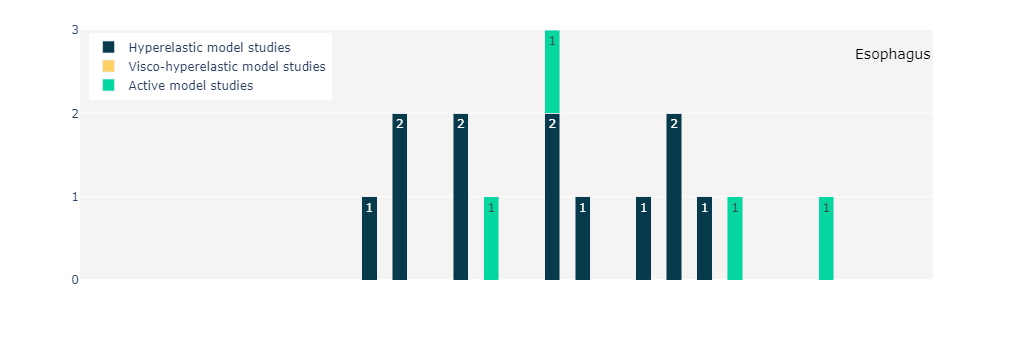

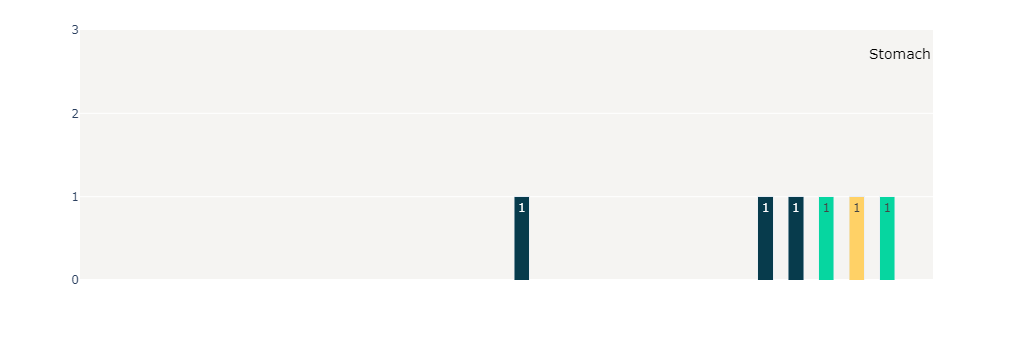

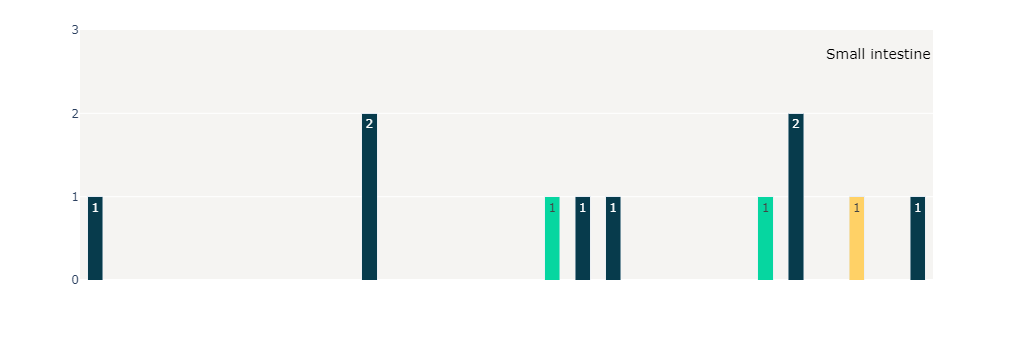

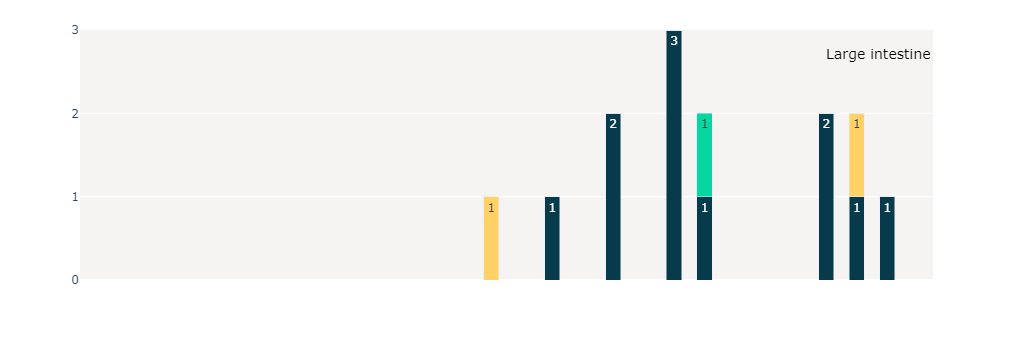

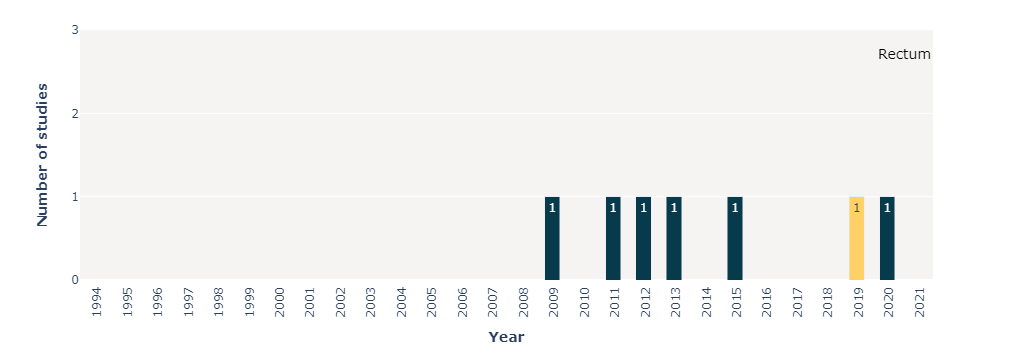

In [20]:
#plot
for organ in organ_list:
    df = yearwise_distribution_dict[organ]

    fig = go.Figure(data=[
                go.Bar(name = 'Hyperelastic model studies',
                x=df['Year'], y=df['Number of hyperelastic studies'],
                text=df['Number of hyperelastic studies'],
                textposition='auto',
                marker=dict(color=color_palette[0])
                      ),
                go.Bar(name = 'Visco-hyperelastic model studies',
                x=df['Year'], y=df['Number of visco-hyperelastic studies'],
                text=df['Number of visco-hyperelastic studies'],
                textposition='auto',
                marker=dict(color=color_palette[1]),
                      ),
                go.Bar(name = 'Active model studies',
                x=df['Year'], y=df['Number of active studies'],
                text=df['Number of active studies'],
                textposition='auto',
                marker=dict(color=color_palette[2]),
                      )
    ])

    fig.update_layout(
        barmode='stack',
        bargap=0.5,
        autosize=False,
        width=1000,
        height=200,
        xaxis = dict(tickvals = [], showgrid = False, dtick = 1),
        xaxis_tickangle=-90, 
        yaxis = dict(dtick = 1),
        plot_bgcolor=plot_background_color,
        yaxis_range=[0,3],
        showlegend=False,
        margin=go.layout.Margin(
            t=30, #top margin
        )
    )
    
    if organ == 'Esophagus':
        fig.update_layout(
            showlegend=True,
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01), 
            legend_traceorder = 'normal',
        )
        
    if organ == 'Rectum':
        fig.update_layout(
            xaxis = dict(tickvals = df['Year'], title="<b> Year <b>"),
            yaxis = dict(title="<b> Number of studies <b>"),
        )
        
    fig.add_annotation(
            xref="paper", yref="paper",
            x=1, y=0.95,
            text=organ,
            showarrow=False,
            font=dict(
                size=14,
                color="black"
            ),
                      )

    fig.show()
    #fig.write_image(str(organ)+ "-year-wise.png", engine="kaleido", scale = 1.0)

## 7.2. Tissue source

In [21]:
# get frequency for each species
species_list = list(df_all_data_year["Species category"].dropna())
species_list.remove('NP')
print("Species are clearly specified in ", str(len(species_list)), " studies")
species_list_decreasing_frequency = sorted(set(species_list), key = lambda ele: species_list.count(ele))
species_list_decreasing_frequency.reverse()
species_list_decreasing_frequency
# hyperelastic 
dict_source = {}
dict_hyperelastic = {}
for species in species_list_decreasing_frequency:
    dict_hyperelastic[species] = len(df_hyperelastic[df_hyperelastic['Species category']==species])
dict_source['Hyperelastic model studies'] = dict_hyperelastic

# visco-hyperelastic 
dict_viscohyper = {}
for species in species_list_decreasing_frequency:
    dict_viscohyper[species] = len(df_viscous[df_viscous['Species category']==species])
dict_source['Visco-hyperelastic model studies'] = dict_viscohyper

# active
dict_active = {}
for species in species_list_decreasing_frequency:
    dict_active[species] = len(df_active[df_active['Species category']==species])
dict_source['Active model studies'] = dict_active

swine_proportion = round(species_list.count("Swine")/len(species_list)*100,0)
rodent_proportion = round(species_list.count("Rodent")/len(species_list)*100,0)
human_proportion = round(species_list.count("Human")/len(species_list)*100,0)

print("Swine: ", str(swine_proportion), "%")
print("Rodent: ", str(rodent_proportion), "%")
print("Human: ", str(human_proportion), "%")

Species are clearly specified in  49  studies
Swine:  45.0 %
Rodent:  29.0 %
Human:  12.0 %


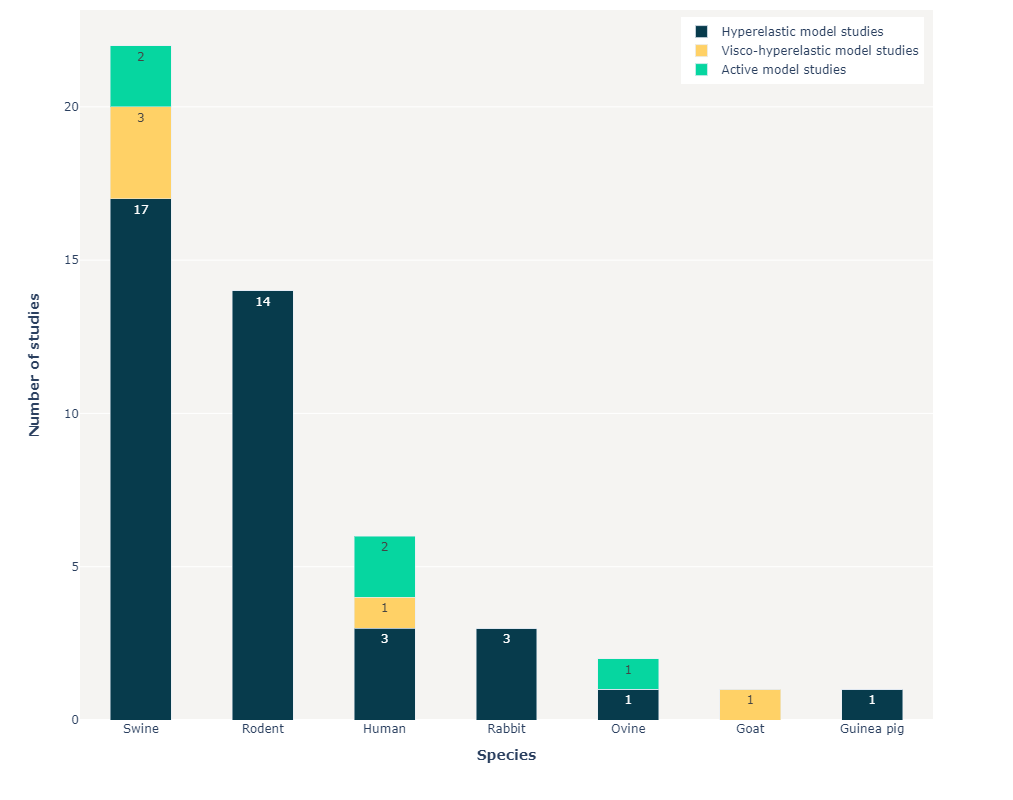

In [22]:
df = pd.DataFrame(dict_source, index=species_list_decreasing_frequency)
# plotly
fig = px.bar(df, 
             x = df.index,
             y = [c for c in df.columns],
             color_discrete_sequence=color_palette
             )

for i, val in enumerate(df.head()):
    fig.data[i].text = df[val]
    fig.data[i].textangle = 0

fig.update_layout(
    barmode='stack',
    bargap=0.5,
    autosize=False,
    width=1000,
    height=800,
    xaxis = dict(title="<b> Species <b>", showgrid = False, dtick = 1),
    yaxis = dict(title="<b> Number of studies <b>"),
    plot_bgcolor= plot_background_color,
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99, title = None), 
    legend_traceorder = 'normal',
    margin=go.layout.Margin(
        t=10, #top margin
    )
)

fig.show()
#fig.write_image("total-studies-tissue-source.png", engine="kaleido", scale = 1.0)

## 7.3. Tissue from diseased subjects

In [23]:
dict_source = {}
# Normal only
dict_organ = {}
dict_organ['All studies'] = len(df_all_data_year[(df_all_data_year['Normal subjects']=="Yes") & (df_all_data_year['Diseased subjects']=="No")]) 
for organ_value in organ_list:
    df_organ = df_all_data_year[df_all_data_year["Organ"] == organ_value]
    dict_organ[organ_value] = len(df_organ[(df_organ['Normal subjects']=="Yes") & (df_organ['Diseased subjects']=="No")])    
dict_source["Normal subjects only"] = dict_organ
# Includes diseased
dict_organ = {}
dict_organ['All studies'] = len(df_all_data_year[df_all_data_year['Diseased subjects']=="Yes"]) 
for organ_value in organ_list:
    df_organ = df_all_data_year[df_all_data_year["Organ"] == organ_value]
    dict_organ[organ_value] = len(df_organ[df_organ['Diseased subjects']=="Yes"])    
dict_source["Includes diseased subjects"] = dict_organ

In [24]:
df_diseased = df_all_data_year[(df_all_data_year['Diseased subjects'] == 'Yes')]
df_diseased[['Year', 'Author', 'Organ', 'Species category', 'Hyperelastic model category', 'Viscous model type', 'Active model category']].sort_values("Year")

,Year,Author,Organ,Species category,Hyperelastic model category,Viscous model type,Active model category
3,2003,Zhao & al.,Small intestine,Rodent,Phenomenological,NaN,NaN
4,2004,Zeng & al.,Esophagus,Rodent,Phenomenological,NaN,NaN
14,2009,Gao & al.,Small intestine,Human,NaN,NaN,Active stress
17,2010,Liao & al.,Small intestine,Guinea pig,Phenomenological,NaN,NaN
39,2017,Sun & al.,Small intestine,Rodent,Phenomenological,NaN,NaN
47,2019,Panda & al.,Small intestine,Human,Phenomenological,Panda-type linear and nonlinear,NaN


## 7.4. Mechanical testing conditions and protocols used

## 7.4.1. Test condition

In [25]:
ex_vivo_count = len(df_all_data_year[df_all_data_year["Test condition"] == 'Ex vivo'])
in_vivo_count = len(df_all_data_year[df_all_data_year["Test condition"] == 'In vivo'])
all_condition_count = ex_vivo_count + in_vivo_count

test_condition_message = "Out of " + str(all_condition_count) + " studies where the testing condition was specified, " + str(ex_vivo_count) + " (" + str(round(ex_vivo_count/all_condition_count*100, 1)) + " %) models were based on ex vivo testing data and " + str(in_vivo_count) + " were based on in vivo testing data."
print(test_condition_message)

Out of 50 studies where the testing condition was specified, 48 (96.0 %) models were based on ex vivo testing data and 2 were based on in vivo testing data.


## 7.4.2. Test protocol

In [26]:
#get frequency for each test protocol
protocol_list = list(df_all_data_year["Test protocol"].dropna())
protocol_list_decreasing_frequency = sorted(set(protocol_list), key = lambda ele: protocol_list.count(ele))
protocol_list_decreasing_frequency.reverse()
protocol_list_decreasing_frequency.remove('NP')

dict_source = {}
for organ_value in organ_list:
    df_organ = df_all_data_year[df_all_data_year["Organ"] == organ_value]
    dict_organ = {}
    for protocol in protocol_list_decreasing_frequency:
        dict_organ[protocol] = len(df_organ[df_organ["Test protocol"]==protocol])
    dict_source[organ_value] = dict_organ

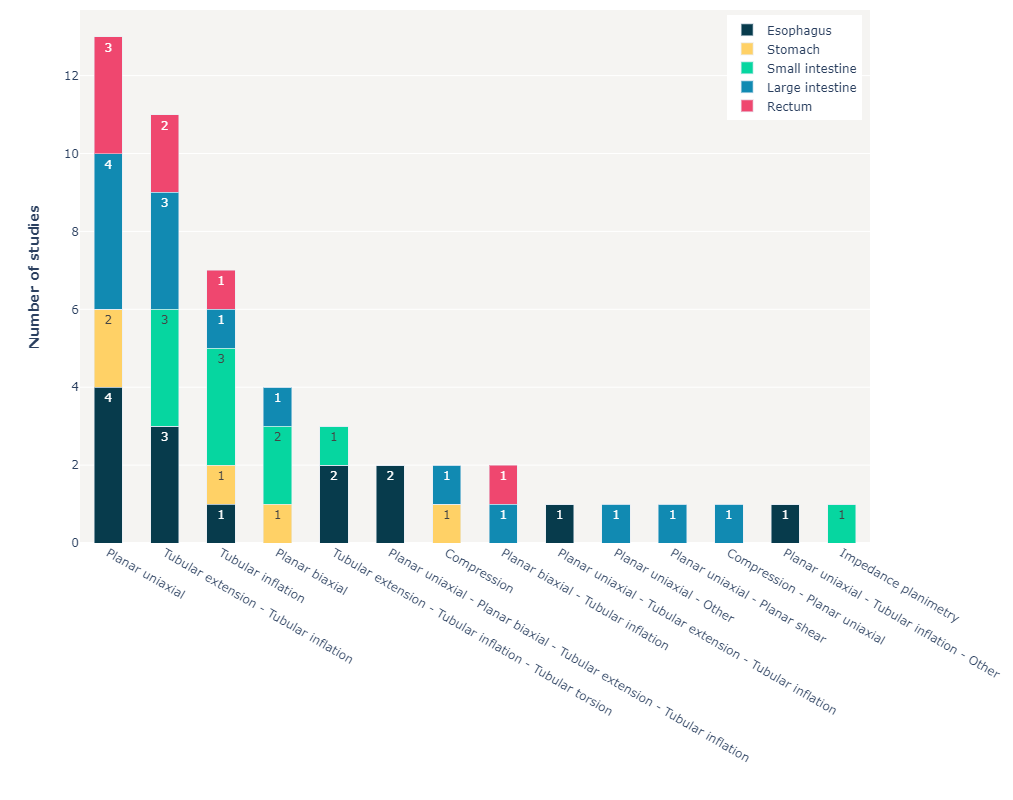

In [27]:
df = pd.DataFrame(dict_source, index = protocol_list_decreasing_frequency)
# plotly
fig = px.bar(df, 
             x = df.index,
             y = [c for c in df.columns],
             color_discrete_sequence=color_palette
             )

for i, val in enumerate(df.head()):
    fig.data[i].text = df[val]
    fig.data[i].textangle = 0
    
fig.update_layout(
    barmode='stack',
    bargap=0.5,
    autosize=False,
    width=1000,
    height=800,
    xaxis = dict(title="<b>  <b>", showgrid = False, dtick = 1),
    yaxis = dict(title="<b> Number of studies <b>"),
    plot_bgcolor= plot_background_color,
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99, title = None), 
    legend_traceorder = 'normal',
    margin=go.layout.Margin(
        t=10, #top margin
    )
)

fig.show()
#fig.write_image("total-studies-test-protocol.png", engine="kaleido", scale = 1.0)

In [28]:
total = df.to_numpy().sum()

sum_val = df.sum(axis=1).values
total_planar_uniaxial = sum_val[0]
total_inflation_extension = sum_val[1]

message = "Studies where testing protocol is reported: " + str(total) \
        + ". Planar uniaxial " + str(round(total_planar_uniaxial/total*100, 1)) \
        + "%, Inflation-extension " + str(round(total_inflation_extension/total*100, 1)) + "%"
print(message)

message = "Total number of different testing protocols: " + str(len(df))
print(message)

Studies where testing protocol is reported: 50. Planar uniaxial 26.0%, Inflation-extension 22.0%
Total number of different testing protocols: 14


In [29]:
df_all_data_year[df_all_data_year["Test condition"] == 'In vivo']

,#,Active model category,Active model type,Age,Author,Comments,DOI,Diseased subjects,Hyperelastic model category,Hyperelastic model type,...,Species category,Species mentioned,Test condition,Test protocol,Title,Unnamed: 25,Viscoelasticity ref,Viscous model type,Year,Zero stress state
8,1,NaN,NaN,Adult,Higa & al.,NaN,https://doi.org/10.1007/978-3-540-36841-0_805,No,NaN,Mooney-Rivlin,...,Goat,Goat,In vivo,Compression,In vivo measurements and constitutive modeling...,NaN,"""In this study, Mooney-Rivlin model incorporat...",Convolution integral,2007,No
14,4,Active stress,Experimental,53 years mean diseased subjects - 52 years mea...,Gao & al.,"duodenum, 6 patients (3M, 3F) all with establi...",https://doi.org/10.1111/j.1365-2982.2009.01314.x,Yes,NaN,NaN,...,Human,Patient/Volunteer,In vivo,Impedance planimetry,"Modelling the elastin, collagen and smooth mus...",NaN,Not mentioned,NaN,2009,No


## 7.5. Hyperelastic model types distribution

In [30]:
#Phenomenological
phenomenological_labels = ['Total <br> phenomenological', 'Fung-type', 'Isotropic']
total_phenomenological = len(df_hyperelastic[df_hyperelastic["Hyperelastic model category"].str.contains('Phenomenological', na = False)])
total_fung = len(df_fung)
total_istropic_phenomenological = len(df_isotropic)
phenomenological_count = [total_phenomenological, total_fung, total_istropic_phenomenological]

#Structure-based
structure_based_labels = ['Total <br> structure-based', 'Holzapfel-type', 'Other']
total_structure_based = len(df_hyperelastic[df_hyperelastic["Hyperelastic model category"].str.contains('Structure-based', na = False)])
total_holzapfel = len(df_holzapfel)
df_sub = df_hyperelastic[df_hyperelastic["Hyperelastic model category"].str.contains("Structure-based", na = False)]
total_other = len(df_sub[~df_sub["Hyperelastic model type"].str.contains("Holzapfel", na = False)])
structure_based_count = [total_structure_based, total_holzapfel, total_other]


#Microstructure-based
microstructure_based_labels = ['Total <br> microstructure-based']
total_microstructure_based = len(df_micro_structure_based)
microstructure_based_count = [total_microstructure_based]

phenomenological_proportion = round(total_phenomenological/len(df_hyperelastic)*100,2)
structure_based_proportion = round(total_structure_based/len(df_hyperelastic)*100,2)
fung_proportion = round(total_fung/len(df_hyperelastic)*100,0)
holzapfel_proportion = round(total_holzapfel/len(df_hyperelastic)*100,0)

print("Phenomenological: ", str(phenomenological_proportion), "%")
print("Structure-based: ", str(structure_based_proportion), "%")
print("Fung-type: ", str(fung_proportion), "%")
print("Holzapfel-type: ", str(holzapfel_proportion), "%")

Phenomenological:  60.0 %
Structure-based:  40.0 %
Fung-type:  40.0 %
Holzapfel-type:  30.0 %


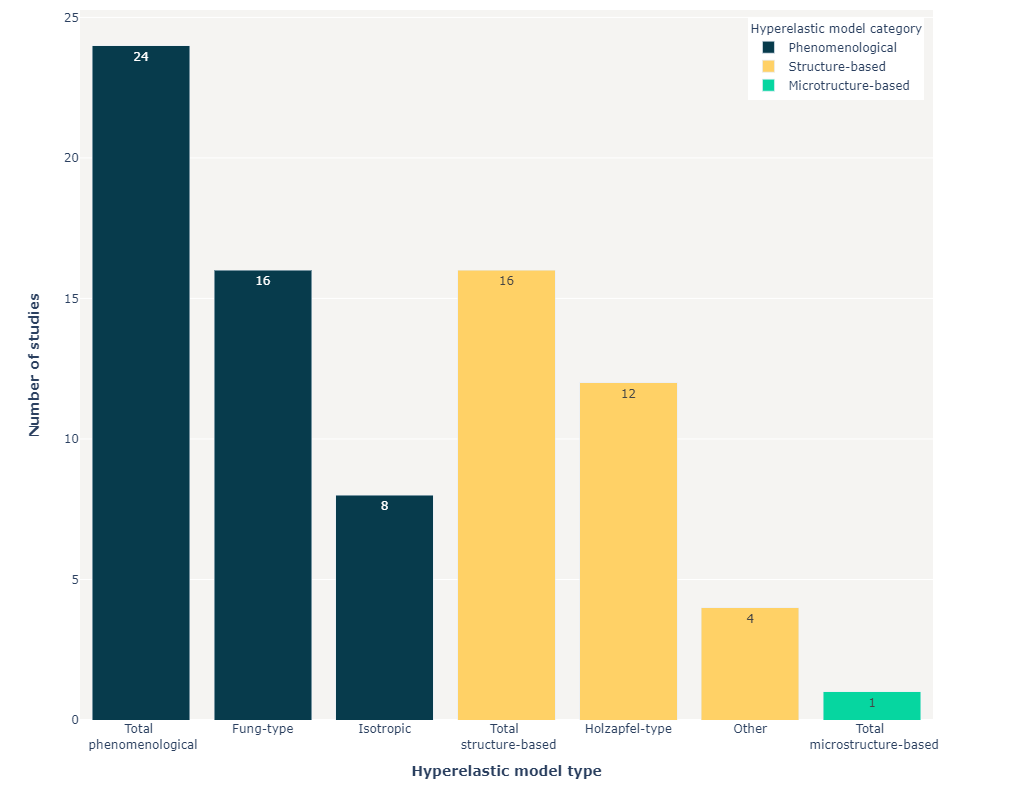

In [31]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=phenomenological_labels,
    y=phenomenological_count,
    name='Phenomenological',
    text = phenomenological_count,
    textposition='auto',
    marker_color = color_palette[0]
))

fig.add_trace(go.Bar(
    x=structure_based_labels,
    y=structure_based_count,
    name='Structure-based',
    text = structure_based_count,
    textposition='auto',
    marker_color=color_palette[1],
))

fig.add_trace(go.Bar(
    x=microstructure_based_labels,
    y=microstructure_based_count,
    name='Microtructure-based',
    text = microstructure_based_count,
    textposition='auto',
    marker_color=color_palette[2]
))

#fig.update_layout(barmode='group')

fig.update_layout(
    barmode='stack',
    autosize=False,
    width=1000,
    height=800,
    xaxis = dict(title="<b> Hyperelastic model type <b>", showgrid = False, dtick = 1),
    yaxis = dict(title="<b> Number of studies <b>"),
    plot_bgcolor= plot_background_color,
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99, title='Hyperelastic model category'), 
    legend_traceorder = 'normal',
    margin=go.layout.Margin(
        t=10, #top margin
    ),
    bargap = 0.2,
)

fig.show()
#fig.write_image("passive-model-distribution.png", engine="kaleido", scale = 1.0)


## 7.6. Active model types distribution

In [32]:
dict_source = {}
active_category_list = ['Active stress', 'Active strain', 'Active electromechanics']
category_count = []
# Active stress
for active_category in active_category_list:
    df_sub = df_all_data_year[df_all_data_year["Active model category"].str.contains(active_category, na = False)]
    category_count.append(len(df_sub))  

active_stress_proportion = round(category_count[0]/len(df_active)*100,0)
active_strain_proportion = round(category_count[1]/len(df_active)*100,0)
active_electromechanics_proportion = round(category_count[2]/len(df_active)*100,0)

print("Active stress: ", str(active_stress_proportion), "%")
print("Active strain: ", str(active_strain_proportion), "%")
print("Active electromechanics: ", str(active_electromechanics_proportion), "%")

Active stress:  56.0 %
Active strain:  33.0 %
Active electromechanics:  11.0 %


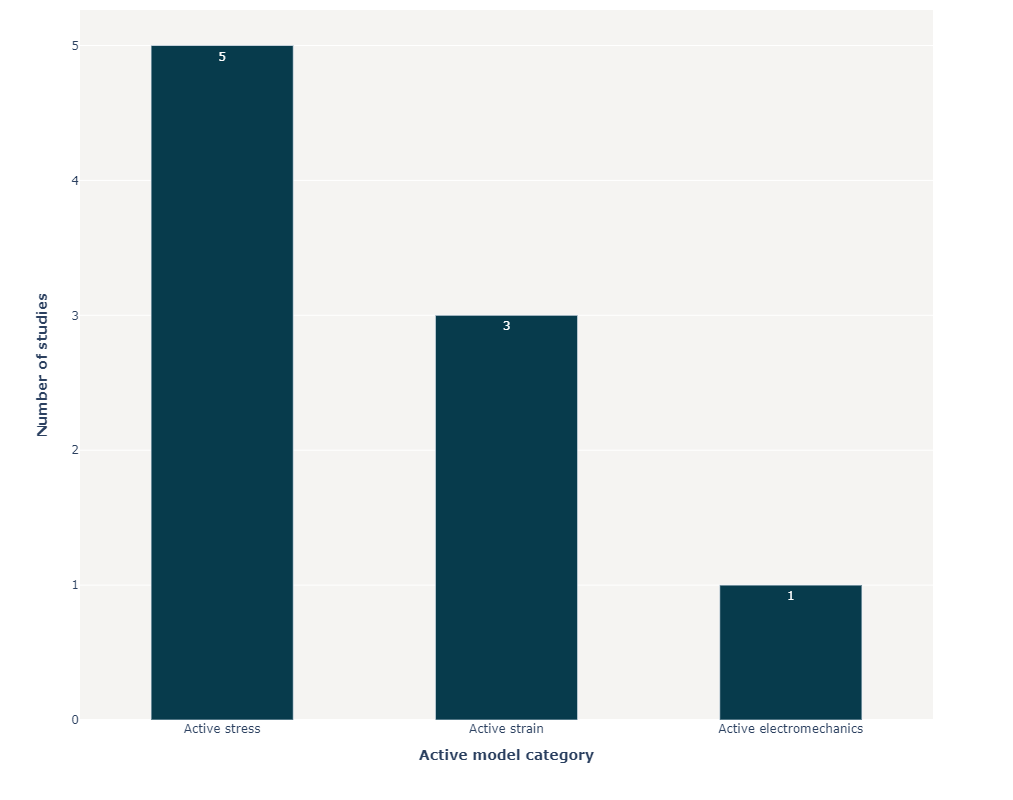

In [33]:
df = pd.DataFrame(dict_source)

fig = go.Figure()
fig.add_trace(go.Bar(
             x = active_category_list,
             y = category_count,
             text = category_count,
            textposition='auto',
            marker_color = color_palette[0]
             ))
    
fig.update_layout(
    barmode='stack',
    bargap=0.5,
    autosize=False,
    width=1000,
    height=800,
    xaxis = dict(title="<b> Active model category <b>", showgrid = False, dtick = 1),
    yaxis = dict(title="<b> Number of studies <b>"),
    plot_bgcolor= plot_background_color,
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99, title = 'Active model type'), 
    legend_traceorder = 'normal',
    margin=go.layout.Margin(
        t=10, #top margin
    )
)

fig.show()
#fig.write_image("active-model-distribution.png", engine="kaleido", scale = 1.0)

## 7.7. Human studies

In [38]:
df_human = df_all_data_year[df_all_data_year['Species category']=="Human"]
df_sub = df_human[['Year', 'Author', 'Organ', 'Diseased subjects', 'Species category', "Modeled entity", "Test condition", "Test protocol", 'Hyperelastic model category', 'Hyperelastic model type', 'Viscous model type', 'Active model category']]
display(df_sub)
#df_sub.to_excel("human_studies.xlsx")

,Year,Author,Organ,Diseased subjects,Species category,Modeled entity,Test condition,Test protocol,Hyperelastic model category,Hyperelastic model type,Viscous model type,Active model category
13,2009,Boubaker & al.,Rectum,No,Human,Intact tissue,Ex vivo,Planar uniaxial,Phenomenological,Ogden,NaN,NaN
14,2009,Gao & al.,Small intestine,Yes,Human,Intact tissue,In vivo,Impedance planimetry,NaN,NaN,NaN,Active stress
24,2012,Rubod & al.,Rectum,No,Human,Intact tissue,Ex vivo,Planar uniaxial,Phenomenological,Mooney-Rivlin,NaN,NaN
29,2013,Puértolas & al.,Large intestine,No,Human,Intact tissue,Ex vivo,Planar uniaxial,Phenomenological,Mooney-Rivlin,NaN,NaN
33,2014,Altomare & al.,Large intestine,No,Human,Individual layer,Ex vivo,Planar uniaxial - Other,Structure-based,Holzapfel,NaN,Active strain
47,2019,Panda & al.,Small intestine,Yes,Human,Intact tissue,Ex vivo,Tubular inflation,Phenomenological,Neo-Hookean,Panda-type linear and nonlinear,NaN
